In [1]:
import glob
import scipy
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from natsort import natsorted
from scipy.stats import describe
from scipy.signal import filtfilt

In [2]:
path = '/Users/patrick/Documents/phd/GitHub/tikhonov/'

In [3]:
g4iso_files = natsorted(glob.glob(path+"g4out/*KE_*_iso.csv"))
R = []
D = []

for i in range(10,len(g4iso_files)-1,5): # 100 keV to 1 MeV energy range in steps of 100 keV
    R.append(np.loadtxt(open(g4iso_files[i], "r"), delimiter=",",skiprows=9)[30:500:1,3]/5000000.0)
R = np.transpose(np.array(R))
RR = R
for j in range(0,470): # X-ray spectra from 0 to 600 keV
    if (np.linalg.norm(R[j,:] > 0)):
        D.append((1.0/np.linalg.norm(R[j,:]))) # Diagonal scaling as a left pre-conditioner
    else:
        D.append(1)

DD = np.diag(D)
RT = np.matmul(DD,R)

S = []
for k in range(0,R.shape[1]):
    #S.append(1.0/(k+1)**2) # right pre-conditioner towards an exponential
    S.append(1.0/np.sum(R[:,k]))
    #S.append(alexa_model_exp[k])
    #S.append(1)
SS = np.diag(S)
RS = np.matmul(RT,SS)

L = []
for j in range(0,R.shape[1]):
    L.append(1.0/np.sqrt(R[j,j]))
L = np.diag(L)

print('response condition number: ' + str(np.linalg.cond(R)))
print('response condition number after preconditioning: ' + str(np.linalg.cond(RS)))

elow_keV = 70
ehigh_keV = 1000
xspace_estep_keV = 1
espace_estep_keV = 50

espace = np.linspace(elow_keV,ehigh_keV,R.shape[1])
xspace = np.linspace(30,500,R.shape[0])

response condition number: 15993.388434455901
response condition number after preconditioning: 173.12830996456856


Text(0.5, 1.0, 'Response Matrix Singular Values')

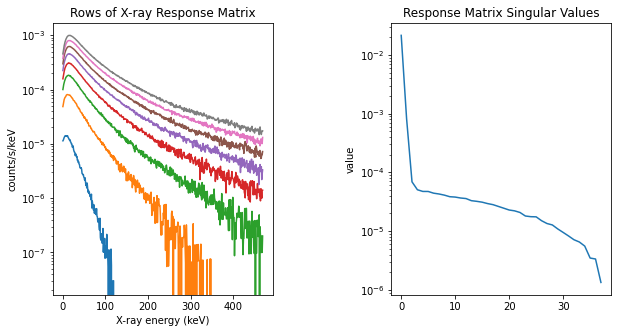

In [37]:
fig = plt.figure(figsize=(10,5))
gs = plt.GridSpec(nrows=1, ncols=2,hspace=.5,wspace=.54)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

for i in range(1,R.shape[1],5):
    ax1.semilogy(R[:,i])
ax2.semilogy(np.linalg.svd(R)[1])

ax1.set_title('Rows of X-ray Response Matrix')
ax1.set_ylabel('counts/s/keV')
ax1.set_xlabel('X-ray energy (keV)')
ax2.set_ylabel('value')
ax2.set_title('Response Matrix Singular Values')


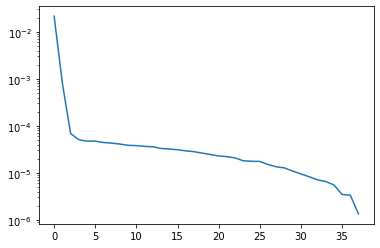

In [26]:
plt.semilogy(np.linalg.svd(R)[1])